# 02_Preprocessing_and_Feature_Engineering

## Contents

1. Libraries Used
2. Importing Data
3. Preprocessing Pipeline
4. Feature Engineering

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


%matplotlib inline

## Importing Data

In [2]:
df = pd.read_csv('./datasets/modified_train.csv')

In [3]:
df.shape

(2051, 80)

In [4]:
df.columns

Index(['Unnamed: 0', 'MS SubClass', 'MS Zoning', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
       'Fence', 'Misc Feature', 'Mo Sold', 'Sale Type', 'has_remod', 'Yr Sold',
       'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
      

In [5]:
# drop unnamed
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.shape

(2051, 79)

## Preprocessing

In [7]:
nominal_features = ['MS SubClass', 'MS Zoning','Street','Alley','Lot Shape',
 'Land Contour','Utilities','Lot Config','Land Slope','Neighborhood',
 'Condition 1','Condition 2','Bldg Type','House Style','Overall Qual',
 'Overall Cond','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
 'Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual',
 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
 'Heating','Heating QC','Central Air','Electrical','Bsmt Full Bath',
 'Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
 'Kitchen Qual','TotRms AbvGrd','Functional','Fireplaces','Fireplace Qu',
 'Garage Type','Garage Finish','Garage Cars','Garage Qual','Garage Cond',
 'Paved Drive','Pool QC','Fence','Misc Feature','Mo Sold','Sale Type',
 'has_remod','Yr Sold']

cont_features = ['Lot Frontage','Lot Area','Mas Vnr Area',
 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
 'Total Bsmt SF','1st Flr SF','2nd Flr SF',
 'Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF',
 'Open Porch SF','Enclosed Porch','3Ssn Porch',
 'Screen Porch','Pool Area','Misc Val',
 'age_since_remodel','age_since_built']

In [9]:
x_cols = [col for col in df if col != 'SalePrice']

In [10]:
def subplot_boxplot(dataframe, list_of_columns,reference='SalePrice'):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100)) # You'll want to specify your figsize

    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x=dataframe[column],y=dataframe[reference],ax=ax[i])

In [11]:
def subplot_countplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,100)) # You'll want to specify your figsize

    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(x=dataframe[column],ax=ax[i])

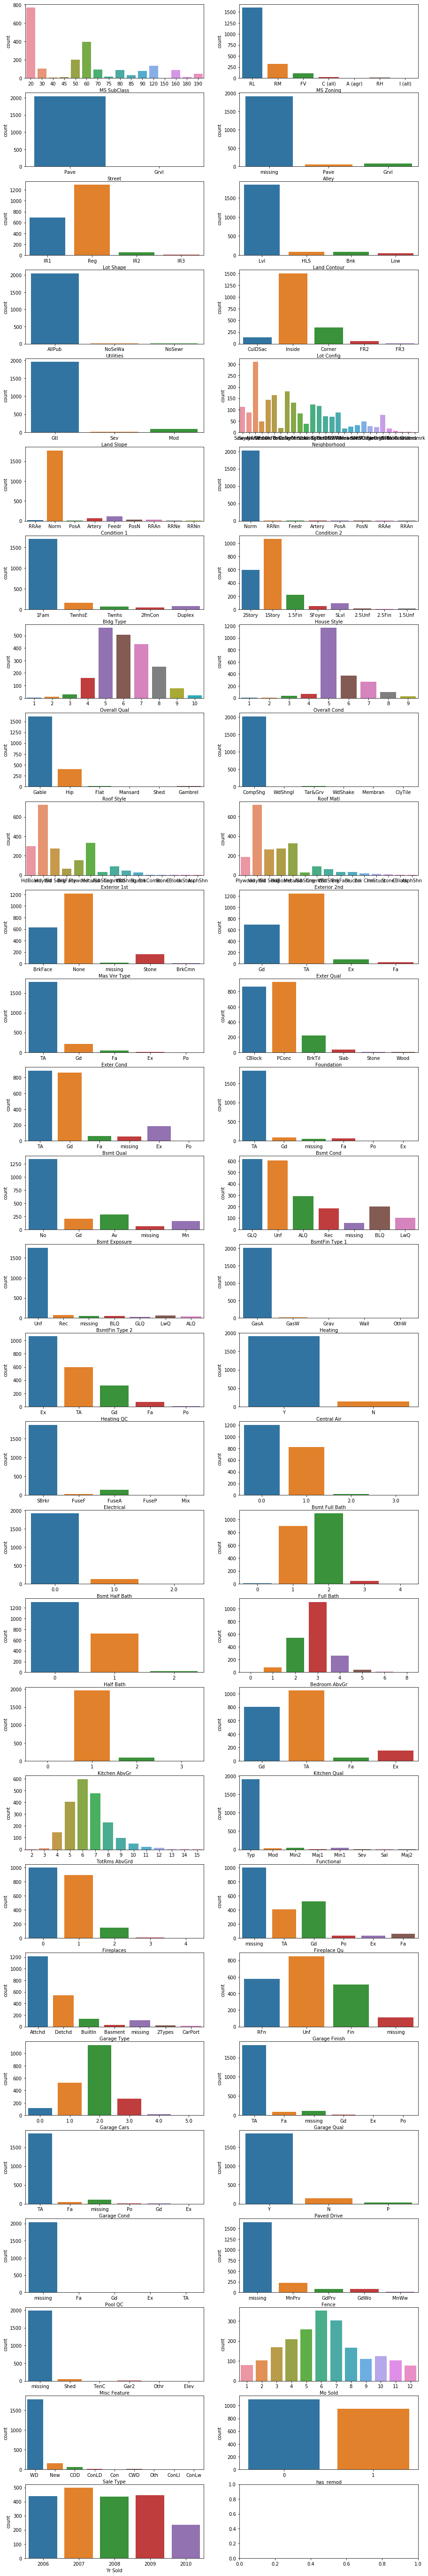

In [12]:
subplot_countplot(df,nominal_features)

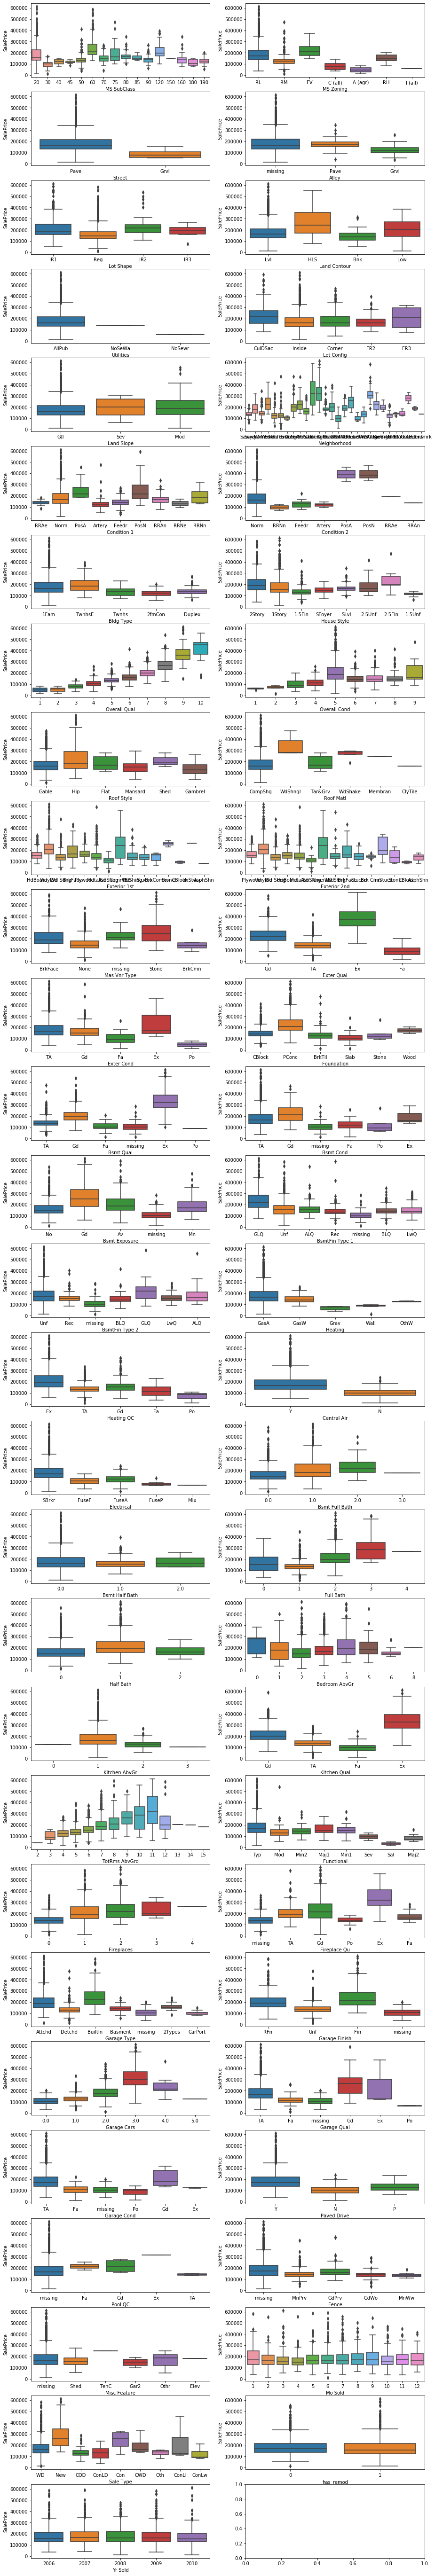

In [13]:
subplot_boxplot(df,nominal_features)

In [14]:
df[nominal_features].head()

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Mo Sold,Sale Type,has_remod,Yr Sold
0,60,RL,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,TA,TA,Y,missing,missing,missing,3,WD,1,2010
1,60,RL,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,TA,TA,Y,missing,missing,missing,4,WD,1,2009
2,20,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,missing,missing,missing,1,WD,1,2010
3,60,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,TA,TA,Y,missing,missing,missing,4,WD,1,2010
4,50,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,TA,TA,N,missing,missing,missing,3,WD,1,2010


In [15]:
df[cont_features].isna().sum().sort_values(ascending=False).head(25)

Lot Frontage         330
Mas Vnr Area          22
BsmtFin SF 1           1
BsmtFin SF 2           1
Bsmt Unf SF            1
Total Bsmt SF          1
Garage Area            1
Low Qual Fin SF        0
Lot Area               0
1st Flr SF             0
2nd Flr SF             0
age_since_built        0
age_since_remodel      0
Wood Deck SF           0
Open Porch SF          0
Enclosed Porch         0
3Ssn Porch             0
Screen Porch           0
Pool Area              0
Misc Val               0
Gr Liv Area            0
dtype: int64

## Feature Selection Part II 

Reduce features in model via Variance thresholds (if possible).

In [16]:
df[cont_features].var().sort_values()

age_since_remodel    4.418857e+02
Lot Frontage         5.410580e+02
3Ssn Porch           6.365335e+02
age_since_built      9.127082e+02
Pool Area            1.427523e+03
Low Qual Fin SF      2.608029e+03
Screen Porch         3.291799e+03
Enclosed Porch       3.581437e+03
Open Porch SF        4.455194e+03
Wood Deck SF         1.652495e+04
BsmtFin SF 2         2.722530e+04
Mas Vnr Area         3.061210e+04
Garage Area          4.662773e+04
1st Flr SF           1.571702e+05
2nd Flr SF           1.811958e+05
Bsmt Unf SF          1.979848e+05
Total Bsmt SF        2.019700e+05
BsmtFin SF 1         2.127092e+05
Gr Liv Area          2.504480e+05
Misc Val             3.287807e+05
Lot Area             4.546116e+07
dtype: float64

<img src="./img/numerical_corr.png">

From correlation plot we shall drop correlations < 0.3 , we shall drop BsmtFin SF2 , Bsmt Unf SF, 2nd Flr SG, Low Qual Fin SF, Enclosed Port, 3Ssn Porch, Pool Area, Misc Val.

In terms of feature collinearity, we can also drop BsmtFin SF1 as it is highly related to Bsmt SF (related feature). Also, we shall drop 1st Flr SF as it seems highly related to the Gr Liv Area. 

We can combine Wood Deck SF, Open Porch SF into a new feature `outdoor_SF`

### New Feature `outdoor_SF`

In [17]:
df['outdoor_SF'] = df['Wood Deck SF'] + df['Open Porch SF'] + df['Screen Porch']

In [18]:
df = df.drop(['Screen Porch','Wood Deck SF','Open Porch SF'],axis=1)

### Update Continuous Features we shall use for our model

In [19]:
new_cont_features = ['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Garage Area',
 'outdoor_SF',
 'age_since_remodel',
 'age_since_built']


### Encode ordinal datatypes

In [20]:
quality_codes = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0,
    'missing' :0,
    np.nan : 0
}

In [21]:
ordinal_quality_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu',
                           'Garage Qual', 'Garage Cond','Pool QC']

In [22]:
for feature in ordinal_quality_features:
    df[feature] = df[feature].map(quality_codes)

In [23]:
df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'Rfn':2,'Unf':1,'NA':0,'missing':0})

In [24]:
df['Lot Shape'] = df['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'missing':0})

In [25]:
df['Land Slope'] = df['Land Slope'].map({'Gtl':3,'Mod':'2','Sev':'1','missing':0})

In [26]:
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1,'missing':0})

In [27]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LWQ':3,'Unf':2,'NA':1,'missing':0})

In [28]:
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LWQ':3,'Unf':2,'NA':1,'missing':0})

From earlier EDA visualisations, we see that certain features have a low distribution of observations within categories.

In the case of House Style, we can re-bin in to 2story or 1story type.

In [29]:
style_dict = {
    '1Story' : '1Story',
    '1.5Fin' : '1Story',
    '1.5Unf' : '1Story',
    '2Story' : '2Story',
    '2.5Fin' : '2Story',
    '2.5Unf' : '2Story',
    'SFoyer' : 'Split',
    'SLvl'   : 'Split'
}

df['House Style'] = df['House Style'].map(style_dict)

We can combine external condition and external quality as a sum of the two features in a feature : `exter_score`

In [30]:
df['house_score'] = df['Overall Qual'] + df['Overall Cond']

In [31]:
df['exter_score'] = df['Exter Qual'] + df['Exter Cond']

In [32]:
df['fireplace_score'] = df['Fireplace Qu'] * df['Fireplaces']

In [33]:
df['garage_score'] = round((df['Garage Qual'] + df['Garage Cond'] + df['Garage Finish']) / df['Garage Cars'],2)

In [34]:
df['kitchen_score'] = df['Kitchen AbvGr'] * df['Kitchen Qual']

In [35]:
df['total_baths'] = df['Full Bath'] + df['Half Bath']

In [36]:
df['basement_score'] = round(( df['Bsmt Cond'] + df['Bsmt Qual'] ) ** (df['BsmtFin Type 1'] / 7),2)

Rebinning Bedrooms. Bedrooms more than four are just '>4'

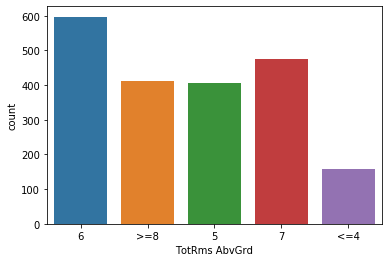

In [37]:
df['TotRms AbvGrd']= df['TotRms AbvGrd'].map(lambda x : '>=8' if x>=8 else ('<=4' if x<=4 else x))

sns.countplot(df['TotRms AbvGrd'])

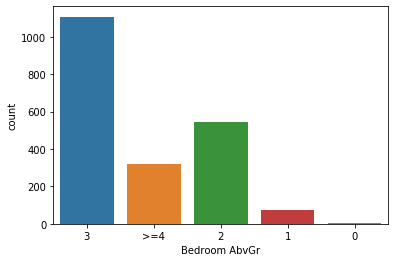

In [38]:
df['Bedroom AbvGr']= df['Bedroom AbvGr'].map(lambda x : '>=4' if x>=4 else x)

sns.countplot(df['Bedroom AbvGr'])

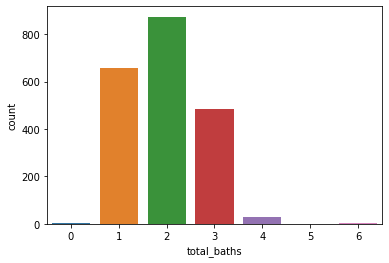

In [39]:
# check distribution of counts of `total_baths`

sns.countplot(df['total_baths'])

In [40]:
# rebin total_baths
df['total_baths'] = df['total_baths'].map(lambda x : '>=3' if x>=3 else x)

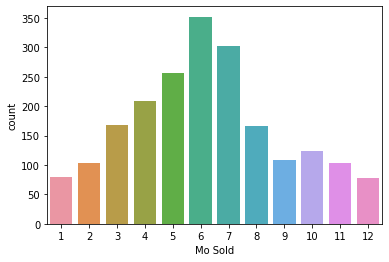

In [41]:
# check distribution of months

sns.countplot(df['Mo Sold'])

In [42]:
# rebin months to seasons
# https://www.timeanddate.com/calendar/aboutseasons.html
# Spring runs from March 1 to May 31;
# Summer runs from June 1 to August 31;
# Fall (autumn) runs from September 1 to November 30; and
# Winter runs from December 1 to February 28 (February 29 in a leap year).

def month_to_season(int_month):
    if (3<=int_month and int_month<=5):
        return 'spring'
    elif (6<=int_month and int_month<=8):
        return 'summer'
    elif (9<=int_month and int_month<=11):
        return 'fall'
    else:
        return 'winter'
    
df['Mo Sold'] = df['Mo Sold'].map(month_to_season)

In [43]:
# convert year to categorical

df['Yr Sold'] = df['Yr Sold'].astype('category')

In [44]:
aggregated_columns = ["house_score","exter_score","fireplace_score","garage_score","kitchen_score",
                     "total_baths","basement_score"]

In [45]:
columns_to_drop = ["MS SubClass","MS Zoning","Street","Alley","Land Countour",
                  "Overall Qual","Overall Cond","Full Bath","Half Bath",
                   "Utilities","Land Slope","Condition 1",
                  "Condition 2","Bldg Type","Roof Matl",
                  "Roof Style","Exter Qual","Exter Cond",'Mas Vnr Type','Bsmt Cond',
                  "Bsmt Exposure","BsmtFin Type 1","Bsmt Qual","BsmtFin Type 2","Heating",
                  "Electrical","Bsmt Half Bath","Kitchen AbvGr","Kitchen Qual",
                  "Functional","Fireplace Qu","Fireplaces","Garage Qual","Garage Cond","Garage Finish","Garage Cars",
                  "Paved Drive","Pool QC","Fence","Misc Feature","Sale Type","Neighborhood","Foundation",
                  "Exterior 1st" , "Exterior 2nd","Bsmt Full Bath", "Garage Type" , "Lot Config"]

In [46]:
new_nom_feature = [col for col in nominal_features if col not in columns_to_drop]

In [47]:
new_nom_feature.extend(aggregated_columns)

In [48]:
new_nom_feature

['Lot Shape',
 'Land Contour',
 'House Style',
 'Heating QC',
 'Central Air',
 'Bedroom AbvGr',
 'TotRms AbvGrd',
 'Mo Sold',
 'has_remod',
 'Yr Sold',
 'house_score',
 'exter_score',
 'fireplace_score',
 'garage_score',
 'kitchen_score',
 'total_baths',
 'basement_score']

In [49]:
{key:list(feature.unique())  for key,feature in df[new_nom_feature].iteritems()}

{'Lot Shape': [3, 4, 2, 1],
 'Land Contour': ['Lvl', 'HLS', 'Bnk', 'Low'],
 'House Style': ['2Story', '1Story', 'Split'],
 'Heating QC': [5, 3, 4, 2, 1],
 'Central Air': ['Y', 'N'],
 'Bedroom AbvGr': [3, '>=4', 2, 1, 0],
 'TotRms AbvGrd': [6, '>=8', 5, 7, '<=4'],
 'Mo Sold': ['spring', 'winter', 'summer', 'fall'],
 'has_remod': [1, 0],
 'Yr Sold': [2010, 2009, 2006, 2007, 2008],
 'house_score': [14, 12, 10, 11, 13, 15, 7, 17, 6, 4, 9, 8, 5, 16, 19, 2],
 'exter_score': [7, 6, 8, 5, 4, 10, 3, 9],
 'fireplace_score': [0, 3, 4, 6, 1, 5, 8, 2, 12, 10, 9],
 'garage_score': [nan,
  7.0,
  4.5,
  3.5,
  1.67,
  9.0,
  3.0,
  6.0,
  4.0,
  5.0,
  2.5,
  2.33,
  2.0,
  1.75,
  2.25,
  13.0,
  8.0,
  5.5,
  1.2,
  10.0,
  3.33,
  11.0],
 'kitchen_score': [4, 3, 2, 5, 6, 8, 0, 9],
 'total_baths': ['>=3', 1, 2, 0],
 'basement_score': [6.0,
  7.0,
  1.74,
  1.67,
  4.65,
  2.78,
  3.04,
  1.0,
  1.81,
  4.01,
  5.3,
  3.6,
  nan,
  8.0,
  9.0,
  1.49,
  1.58,
  5.94,
  1.87,
  2.51,
  3.28,
  3.16,


In [50]:
# fix NaNs in scores

df['garage_score'] = df['garage_score'].map(lambda x: 0 if np.isnan(x) else x)
df['basement_score'] = df['garage_score'].map(lambda x: 0 if np.isnan(x) else x)

In [51]:
# check for nan's and contents of each columns
{key:list(feature.unique())  for key,feature in df[new_nom_feature].iteritems()}

{'Lot Shape': [3, 4, 2, 1],
 'Land Contour': ['Lvl', 'HLS', 'Bnk', 'Low'],
 'House Style': ['2Story', '1Story', 'Split'],
 'Heating QC': [5, 3, 4, 2, 1],
 'Central Air': ['Y', 'N'],
 'Bedroom AbvGr': [3, '>=4', 2, 1, 0],
 'TotRms AbvGrd': [6, '>=8', 5, 7, '<=4'],
 'Mo Sold': ['spring', 'winter', 'summer', 'fall'],
 'has_remod': [1, 0],
 'Yr Sold': [2010, 2009, 2006, 2007, 2008],
 'house_score': [14, 12, 10, 11, 13, 15, 7, 17, 6, 4, 9, 8, 5, 16, 19, 2],
 'exter_score': [7, 6, 8, 5, 4, 10, 3, 9],
 'fireplace_score': [0, 3, 4, 6, 1, 5, 8, 2, 12, 10, 9],
 'garage_score': [0.0,
  7.0,
  4.5,
  3.5,
  1.67,
  9.0,
  3.0,
  6.0,
  4.0,
  5.0,
  2.5,
  2.33,
  2.0,
  1.75,
  2.25,
  13.0,
  8.0,
  5.5,
  1.2,
  10.0,
  3.33,
  11.0],
 'kitchen_score': [4, 3, 2, 5, 6, 8, 0, 9],
 'total_baths': ['>=3', 1, 2, 0],
 'basement_score': [0.0,
  7.0,
  4.5,
  3.5,
  1.67,
  9.0,
  3.0,
  6.0,
  4.0,
  5.0,
  2.5,
  2.33,
  2.0,
  1.75,
  2.25,
  13.0,
  8.0,
  5.5,
  1.2,
  10.0,
  3.33,
  11.0]}

Segment ordinal and nominal columns

In [52]:
ordinal_columns = ['Lot Shape', 'Heating QC','house_score','exter_score','fireplace_score',
                  'garage_score','kitchen_score','basement_score']
nominal_columns = [col for col in new_nom_feature if col not in ordinal_columns]

In [53]:
# combine ordinal columns with existing numerical columns
new_cont_features.extend(ordinal_columns)

In [54]:
new_cont_features.append('SalePrice')

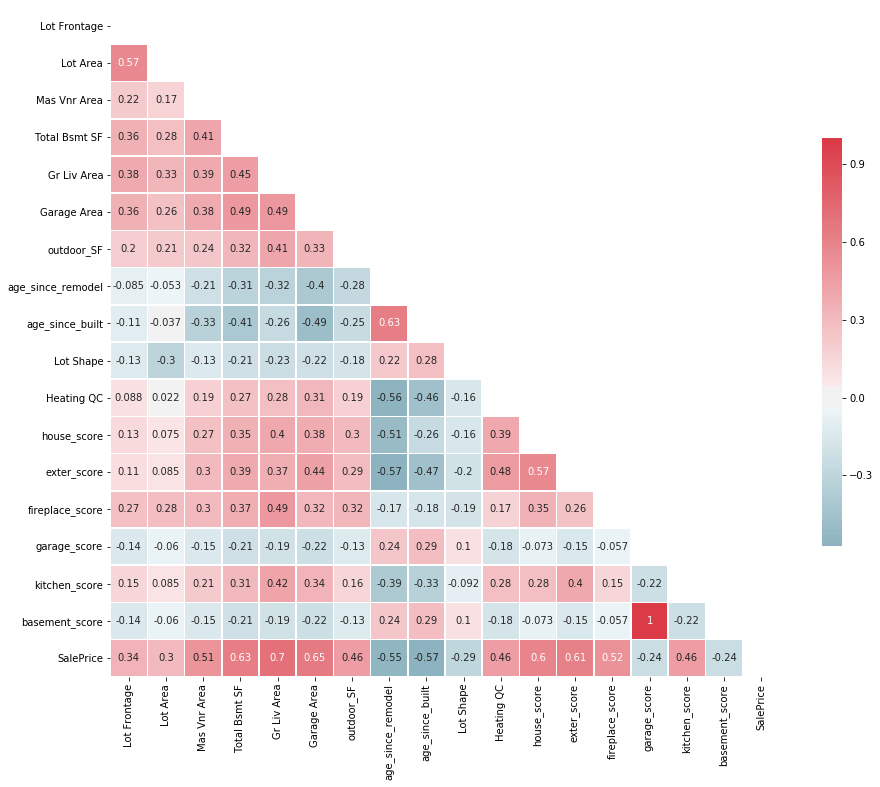

In [55]:
# check pairwise correlations for ordinal and continous columns



# Compute the correlation matrix
corr = df[new_cont_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)


From correlation plot,`Lot Frontage`, `Lot Area`, `Lot Shape`,`garage_score` and `basement score` are relatively weakly correlated to SalePrice.

It is a design decision to let the `age_since_remodel` and `age_since_built` seperated into two distinct features

We can see that `house_score` and `exter_score` have a high degree of relationships, as well as the `basement_score` and `garage_score`.

Since our model already has plenty of features, we can drop `lot shape`

In [56]:
# combined features 

df['garage_basement_score'] = df['garage_score'] * df ['basement_score']
df['house_exter_score'] = df['house_score'] * df ['exter_score']
df['lot_area_frontage'] = df['Lot Frontage'] * df['Lot Area']

In [57]:
updated_numerical_columns = ['lot_area_frontage','Mas Vnr Area','Total Bsmt SF','Gr Liv Area',
                            'Garage Area','outdoor_SF','age_since_remodel','age_since_built',
                            'Heating QC','house_exter_score','fireplace_score',
                             'garage_basement_score','kitchen_score']

In [58]:
df[updated_numerical_columns].describe()

,lot_area_frontage,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Garage Area,outdoor_SF,age_since_remodel,age_since_built,Heating QC,house_exter_score,fireplace_score,garage_basement_score,kitchen_score
count,1.721000e+03,2029.000000,2050.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.311398e+05,99.695909,1057.987805,1499.330083,473.671707,157.901999,23.585568,36.066797,4.158459,76.488542,2.033642,16.737022,3.644564
std,7.464058e+05,174.963129,449.410704,500.447829,215.934561,156.657998,21.021078,30.211061,0.964112,17.322233,2.283203,19.076115,0.838665
min,3.087000e+04,0.000000,0.000000,334.000000,0.000000,0.000000,-2.000000,-1.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,4.338000e+05,0.000000,793.000000,1129.000000,319.000000,20.500000,4.000000,7.000000,3.000000,66.000000,0.000000,0.000000,3.000000
50%,6.348800e+05,0.000000,994.500000,1444.000000,480.000000,138.000000,15.000000,34.000000,5.000000,77.000000,1.000000,12.250000,4.000000
75%,8.855000e+05,161.000000,1318.750000,1728.500000,576.000000,243.000000,43.000000,54.000000,5.000000,84.000000,4.000000,20.250000,4.000000
max,1.999663e+07,1600.000000,6110.000000,5642.000000,1418.000000,1424.000000,60.000000,136.000000,5.000000,190.000000,12.000000,169.000000,9.000000


In [59]:
# fix negative ages by resetting it to zero
df['age_since_remodel'] = df['age_since_remodel'].map(lambda x : 0 if x<0 else x)
df['age_since_built'] = df['age_since_built'].map(lambda x : 0 if x<0 else x)

In [60]:
updated_numerical_columns.append('SalePrice')

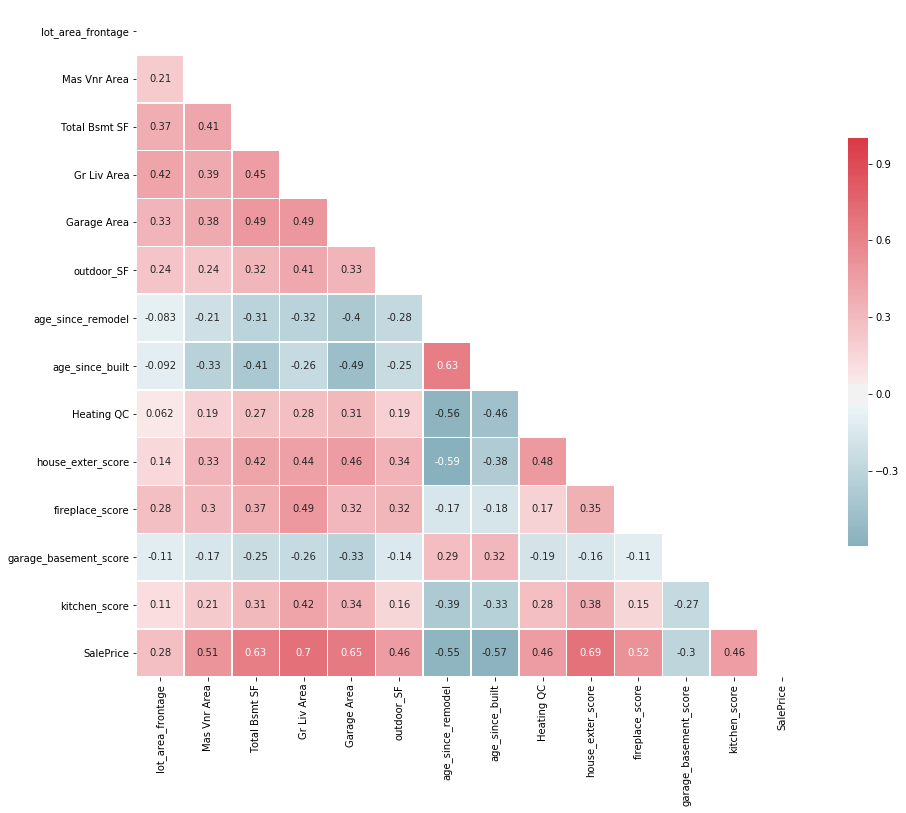

In [61]:
# recheck correlations on updated columns
# Compute the correlation matrix
corr = df[updated_numerical_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)


In [62]:
# get dummies for the nominal columns
nominal_df = pd.get_dummies(df[nominal_columns],drop_first=True)

In [63]:
# extract out numerical columns for original dataframe

numerical_df = df[updated_numerical_columns].copy()

In [64]:
trsfm_df = nominal_df.join(numerical_df)

In [65]:
trsfm_df.columns

Index(['has_remod', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl',
       'House Style_2Story', 'House Style_Split', 'Central Air_Y',
       'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
       'Bedroom AbvGr_>=4', 'TotRms AbvGrd_6', 'TotRms AbvGrd_7',
       'TotRms AbvGrd_<=4', 'TotRms AbvGrd_>=8', 'Mo Sold_spring',
       'Mo Sold_summer', 'Mo Sold_winter', 'Yr Sold_2007', 'Yr Sold_2008',
       'Yr Sold_2009', 'Yr Sold_2010', 'total_baths_1', 'total_baths_2',
       'total_baths_>=3', 'lot_area_frontage', 'Mas Vnr Area', 'Total Bsmt SF',
       'Gr Liv Area', 'Garage Area', 'outdoor_SF', 'age_since_remodel',
       'age_since_built', 'Heating QC', 'house_exter_score', 'fireplace_score',
       'garage_basement_score', 'kitchen_score', 'SalePrice'],
      dtype='object')

In [66]:
trsfm_df.isna().sum().sort_values(ascending=False).head()

lot_area_frontage    330
Mas Vnr Area          22
Total Bsmt SF          1
Garage Area            1
SalePrice              0
dtype: int64

We will impute values to handle the NAs just before model fitting.

## Store transformed dataframe into csv

In [67]:
trsfm_df.to_csv('./datasets/transformed_train.csv')